<a href="https://colab.research.google.com/github/Songhamin01/dbp01/blob/main/MLB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 프로젝트_202014280_송하민

# MLB_Analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2023 시즌 MLB 선수(투수, 타자) 기록 자료 불러오기
batting = pd.read_csv('2023 MLB Player Stats - Batting.csv', encoding = 'unicode_escape', sep=';', index_col = 'Rk')
piching = pd.read_csv('2023 MLB Player Stats - Pitching.csv', encoding = 'unicode_escape', sep=';', index_col = 'Rk')

# 결측치 확인 - 결측치가 존재하지 않음을 확인
batting.isnull().sum() # 결과 : 모든 컬럼 0
piching.isnull().sum() # 결과 : 모든 컬럼 0

# 선수 이름이 중복되는 데이터가 존재한다.
# 중복 데이터 중 최신 데이터인 마지막 값만 남기고 삭제
batting.drop_duplicates(['Name'], keep='last')
piching.drop_duplicates(['Name'], keep='last')

# 투수 정보에서 경기에 5번 미만으로 출전한 선수(G >= 5), 리그에 속하지 않은 선수(Lg = MLB) 제거
piching = piching[piching.G >= 5]
piching = piching[piching.Lg != 'MLB']
# 타자 정보에서 타석에 10번 이하로 들어간 선수(G >= 10), 팀에 속하지 않은 선수(Tm = TOT), 리그에 속하지 않은 선수(Lg = MLB) 제거
batting = batting[batting.G > 10]
batting = batting[batting.Lg != 'MLB']
batting = batting[batting.Tm != 'TOT']



---



# 1. ERA와 OPS란?
## - **ERA** : ERA는 평균자책점으로 야구에서 투수가 한 게임(9이닝) 당 내준 평균(Average) 자책점(Earned Runs)이다. 이는 투수가 상대에게 얼마만큼의 점수를 내주었는지를 나타내는 지표이며, 수치가 낮을수록 좋은 기록이다.

## - **OPS** : OPS는 “On base Plus Slugging”의 약자이며 말 그대로 출루율과 장타율의 합이다. 이는 타자가 얼마나 출루했으며, 얼만큼의 장타력을 보유 했는지를 나타내는 지표이며, 수치가 높을 수록 좋은 기록이다.


---



# 2. 어떤 지표의 영향이 더 큰가?

## 2-1. W(승리횟수)와 WHIP(이닝 당 출루 허용율) 중 어떤 지표가 ERA에게 더 영향을 미치는가?

In [37]:
# 가정1 : ERA(방어율)는 WHIP(이닝 당 출루 허용률)보다 W(승리횟수)의 영향을 더 받을 것이다.

df_piching = piching.copy(deep = True)

X = df_piching[['W', 'WHIP']]
y = df_piching['ERA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train.W.values.reshape(-1, 1), y_train)

y_predict = model.predict(X_test.W.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 4.014776237417177
RMSE : 2.0036906541223316


In [38]:
# 가정2 : ERA(방어율)는 W(승리횟수)보다 WHIP(이닝 당 출루 허용률)의 영향을 더 받을 것이다.

df_piching = piching.copy(deep = True)

X = df_piching[['W', 'WHIP']]
y = df_piching['ERA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train.WHIP.values.reshape(-1, 1), y_train)

y_predict = model.predict(X_test.WHIP.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 1.6996691343009804
RMSE : 1.3037135936627264


## 2-2. OBP(출루율)와 SLG(장타율) 중 어떤 지표가 OPS에게 더 영향을 미치는가?

In [39]:
# 가정1 : OPS(출루율 + 장타율) 수치는 SLG(장타율) 기록보다 OBP(출루율) 기록의 영향을 더 받을 것이다.

df_batting = batting.copy(deep = True)

X = df_batting[['OBP', 'SLG']]
y = df_batting['OPS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train.OBP.values.reshape(-1, 1), y_train)

y_predict = model.predict(X_test.OBP.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 0.006246125669580904
RMSE : 0.07903243428859384


In [40]:
# 가정2 : OPS(출루율 + 장타율) 수치는 OBP(출루율) 기록보다 SLG(장타율) 기록의 영향을 더 받을 것이다.

df_batting = batting.copy(deep = True)

X = df_batting[['OBP', 'SLG']]
y = df_batting['OPS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train.SLG.values.reshape(-1, 1), y_train)

y_predict = model.predict(X_test.SLG.values.reshape(-1, 1))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 0.001473610222451765
RMSE : 0.038387631112791594



## **👉 결론**
ERA 지표의 경우 가정 1의 MSE, RMSE 수치보다 가정 2의 MSE, RMSE 수치가 낮게 나왔다.

OPS 지표 또한 가정 1의 MSE, RMSE 수치보다 가정 2의 MSE, RMSE 수치가 낮게 나왔다.

따라서,

    ⚾️ 투수에게 중요한 지표 중 하나인 ERA(방어율)는 W(승리횟수)보다 WHIP(이닝당 출루 허용율) 기록에 더 많은 영향을 받는다.
    ⚾️ 타자에게 가장 중요한 지표인 OPS(출루율 + 장타율)는 OBP(출루율)보다 SLG(장타율) 기록에 더 많은 영향을 받는다.



---



# 3. ERA 데이터 분석

## 3-1) 팀별 투수(ERA) 평균 비교 및 상위 5개 팀 출력

<ipython-input-41-ea3783b4a5b5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pich = piching.groupby(['Tm']).mean()['ERA']


Tm
NYY    3.661176
TBR    3.682727
MIN    3.687000
HOU    3.700000
SFG    3.756667
Name: ERA, dtype: float64

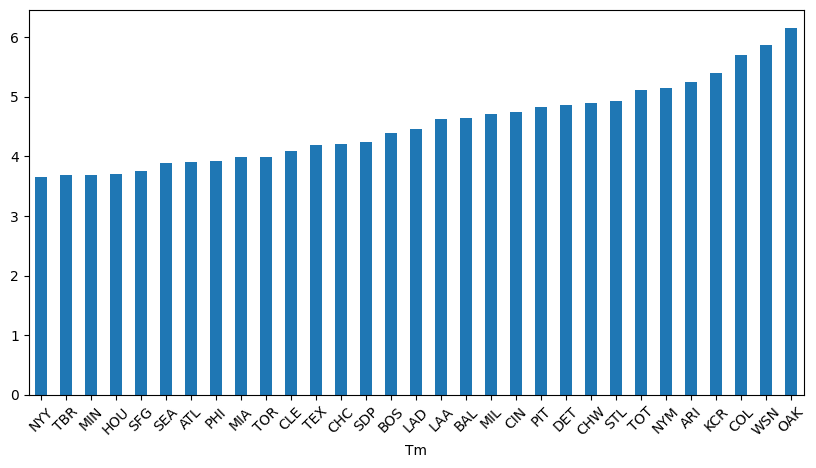

In [41]:
# piching 데이터프레임에서 팀(Tm)별로 그룹화 한 후 ERA의 평균값만 추출
pich = piching.groupby(['Tm']).mean()['ERA']

# 팀별 투수 ERA 평균 데이터 pich를 평균값 크기 순으로 정렬
pich = pich.sort_values()

# 팀별 투수 ERA 평균 데이터를 막대그래프 형식으로 시각화
pich.plot.bar(x=pich.index, y=pich.values, rot=45, figsize=(10, 5))

# 상위 5개의 팀 이름과 성적 출력
pich.head()

## 3-2. 리그별 ERA 평균 비교

<ipython-input-42-dd02b81f5aa1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(piching['ERA'].loc[piching['Lg'] == 'NL'], color = 'blue')
<ipython-input-42-dd02b81f5aa1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(piching['ERA'].loc[piching['Lg'] == 'AL'], color = 'red')


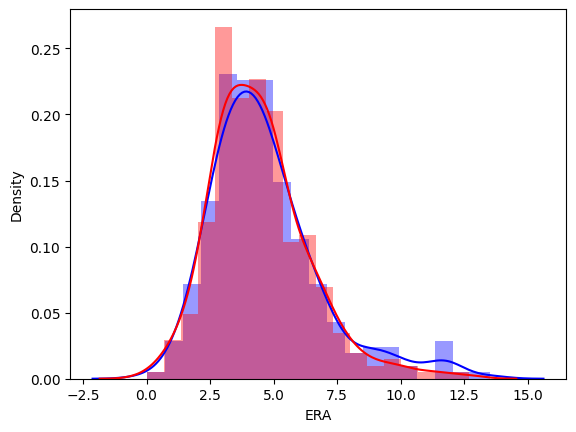

The ERA average for National League pitchers is 4.680477815699659
The ERA average for American League pitchers is 4.454026402640265


In [42]:
# Pairgrid 범주형 * 연속형 시각화
sns.distplot(piching['ERA'].loc[piching['Lg'] == 'NL'], color = 'blue')
sns.distplot(piching['ERA'].loc[piching['Lg'] == 'AL'], color = 'red')

# 리그별 투수 ERA 평균값 비교
nl_era = piching[piching['Lg'] == 'NL']['ERA'].mean()
al_era = piching[piching['Lg'] == 'AL']['ERA'].mean()
plt.show()
print(f'The ERA average for National League pitchers is {nl_era}')
print(f'The ERA average for American League pitchers is {al_era}')

# ERA 평균이 아메리칸 리그(AL)이 네셔널 리그(NL)보다 낮기 때문에
# 아메리칸 리그에 좋은 ERA 기록을 가진 투수가 더 많다고 할 수 있다.

# **👉 결론**
    ⚾️ 뉴욕 양키스(NYY), 템파베이 레이스(TBR), 미네소타 트원스(MIN), 휴스턴 에스트로스(HOU),
       센프란시스코 자이언츠(SFG) 순서대로 투수의 ERA 기록이 좋은 팀이다.

    ⚾️ 아메리칸 리그(AL)는 네셔널 리그(NL)보다 좋은 ERA 기록을 보유한 투수가 많다.




---








# 4. OPS 데이터 분석

## 4-1) 팀별 타자(OPS) 비교 및 상위 5개 팀 출력

<ipython-input-43-e25fbb73cc3e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  batt = batting.groupby(['Tm']).mean()['OPS']


Tm
ATL    0.804308
TBR    0.749500
TEX    0.745000
STL    0.739467
LAD    0.739333
Name: OPS, dtype: float64

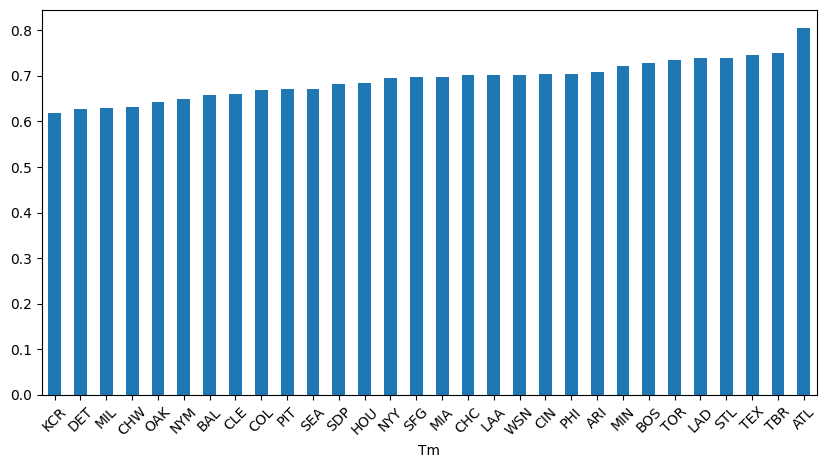

In [43]:
# batting 데이터프레임에서 팀(Tm)별로 그룹화 한 후 OPS의 평균값만 추출
batt = batting.groupby(['Tm']).mean()['OPS']

# 팀별 타자 OPS 평균 데이터 batt를 평균값 크기 순으로 정렬
batt = batt.sort_values()

# 팀별 타자 OPS 평균 데이터를 막대그래프 형식으로 시각화
batt.plot.bar(x=batt.index, y=batt.values, rot=45, figsize=(10, 5))

# 상위 5개의 팀 이름과 성적 출력
# OPS는 높을 수록 좋기 때문에 역순으로 출력
batt.loc[::-1].head()

## 4-2. 리그별 OPS 평균 비교

<ipython-input-44-768164ceae48>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batting['OPS'].loc[batting['Lg'] == 'NL'], color = 'blue')
<ipython-input-44-768164ceae48>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batting['OPS'].loc[batting['Lg'] == 'AL'], color = 'red')


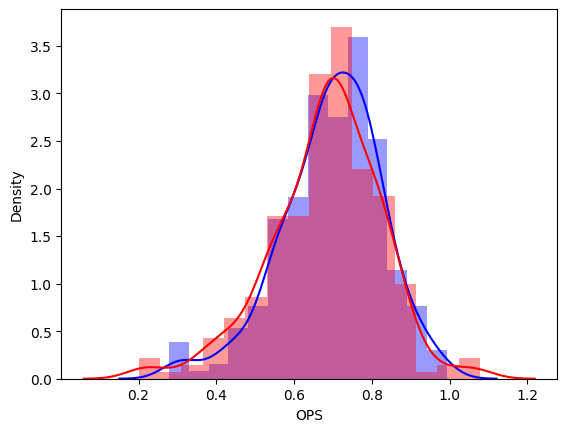

The OPS average for National League batters is 0.69672265625
The OPS average for American League batters is 0.6818671875


In [44]:
# Pairgrid 범주형 * 연속형 시각화
sns.distplot(batting['OPS'].loc[batting['Lg'] == 'NL'], color = 'blue')
sns.distplot(batting['OPS'].loc[batting['Lg'] == 'AL'], color = 'red')

# 리그별 타자 OPS 평균값 비교
nl_ops = batting[batting['Lg'] == 'NL']['OPS'].mean()
al_ops = batting[batting['Lg'] == 'AL']['OPS'].mean()
plt.show()
print(f'The OPS average for National League batters is {nl_ops}')
print(f'The OPS average for American League batters is {al_ops}')

# OPS 평균이 네셔널 리그(NL)가 아메리칸 리그(AL)보다 높기 때문에
# 네셔널 리그에 좋은 OPS 기록을 가진 타자가 더 많다고 할 수 있다.

# **👉 결론**
    ⚾️ 애틀란타 브레이브스(ATL), 템파베이 레이스(TBR), 텍사스 레인져스(TEX), 세인트루이스 카디널스(STL),
    엘에이 다저스(LAD) 순서대로 타자의 OPS 기록이 좋은 팀이다.

    ⚾️ 네셔널 리그(NL)는 아메리칸 리그(AL)보다 좋은 OPS 기록을 보유한 타자가 많다.



---



# 5. 나이가 성적에 영향을 미치는가?

In [45]:
pich2 = piching.copy(deep=True)

# object형인 Age 컬럼을 숫자형으로 변경
pich2['Age'] = pd.to_numeric(pich2['Age'])

# ERA와 Age의 상관계수 계산
cor = pich2['Age'].corr(pich2['ERA'])

print(f'ERA와 Age 사이 상관계수 : {cor:.2f}')

ERA와 Age 사이 상관계수 : -0.07


In [46]:
batt2 = batting.copy(deep=True)

# object형인 Age 컬럼을 숫자형으로 변경
batt2['Age'] = pd.to_numeric(batt2['Age'])

# OPS와 Age의 상관계수 계산
cor = batt2['Age'].corr(batt2['OPS'])

print(f'OPS와 Age 사이 상관계수 : {cor:.2f}')

OPS와 Age 사이 상관계수 : -0.03


# 👉 **결론**
ERA와 Age 사이의 상관계수는 -0.07이며, OPS와 Age 사이의 상관계수는 -0.03이다.

ERA, OPS 모두 Age와 약한 음의 상관관계를 보이고 있으므로,

    ⚾️  선수의 나이가 ERA, OPS 성적에 미치는 영향은 매우 적거나 전혀 없다고 볼 수 있다.

